# SOK-1006 v23
## Innleveringsoppgave 2
### Analyse av en merverdiavgift ("ad valorem tax")

Her skal vi se på virkningen av å ilegge en vare en skatt i henhold til dens verdi (merverdiavgift). Betrakt fremstillingen av markedet for oppdrettslaks i læreboka s. 101-104. Etterspørsel er gitt ved


\begin{equation}
   x^{D}= 500 -3.2p_k\tag{1}
\end{equation}

og tilbud:


\begin{equation}
   x^{S}= -100 + 4.3p_s\tag{2}
\end{equation}

Kjøpere betaler $p_k$ og selgere får $p_s$. Prisen som selgere får er det som konsumenter betaler minus mva $tp_k$, noe som betyr at $p_s=(1-t)p_k$. Her er $1>t\geq 0$ avgiftssatsen. Vi kan skrive (2) også som en funksjon på prisen som konsumenten betaler:

\begin{equation}
   x^{S}= -100 + 4.3 p_k(1-t)\tag{3}
\end{equation}



In [146]:
# importer pakkene
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp

   
1. Tegn inn tilbudsfunksjon med 25% mva, og forklar hvorfor denne har brattere helning enn tilbudsfunksjon uten mva (t=0).
2. Beregn likevektspris og -kvantum med og uten mva, og vis disse i figuren.
3. Beregn og vis inntekten til staten, og andelen som betales av konsumenter og produsenter.
4. Hva er fordeler/ulemper av en mva og en stykkprisavgift?


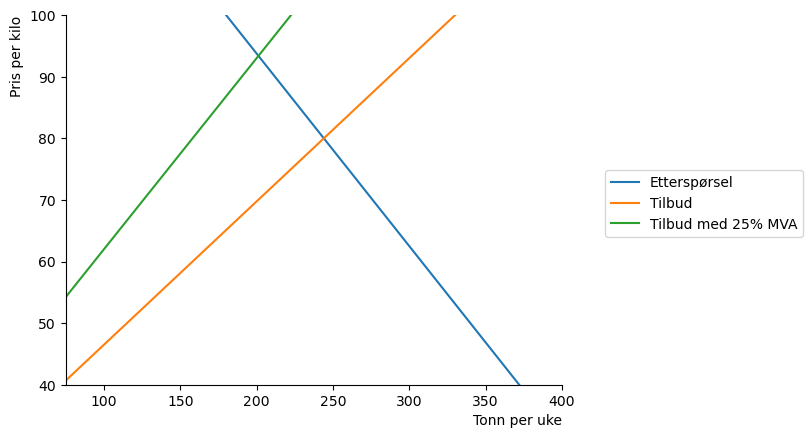

In [222]:
#Oppgave 1

def x_smva(p,t):
    return -100+4.3*p*(1-0.25)

def x_d(p):
    return 500 - 3.2*(p)

def x_s(p,t):
    return -100+4.3*p*(1-t)


p_num=np.linspace(0.1,100,100)

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris per kilo', loc='top')
                ax.set_xlabel('Tonn per uke', loc='right')
                ax.set(xlim=(75,400))
                ax.set(ylim=(40,100))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig, ax = create_ax()

ax.plot(x_d(p_num),p_num, label='Etterspørsel')

ax.plot(x_s(p_num, 0),p_num, label='Tilbud')

ax.plot(x_smva(p_num, 0),p_num, label='Tilbud med 25% MVA')

ax.legend(bbox_to_anchor=(1.5,0.6));

#Tilbudet med 25% MVA har en brattere økning etter som at det de produser har en høyere pris per kilo.
#Det blir også dyrere for dem å produsere, og vil derfor prøve å kompansere for dette med en litt brattere pris økning.

In [148]:
#Oppgave 2

x,p,t=sp.symbols('x p t', positive=True, real=True)

#Betingelse for likevekt uten mva.

eq_likevekt=sp.Eq(x_d(p),x_s(p,t))
eq_likevekt

Eq(500 - 3.2*p, 4.3*p*(1 - t) - 100)

In [149]:
# løs for p
p_eq=sp.solve(eq_likevekt,p)
p_eq[0]

-6000.0/(43.0*t - 75.0)

In [150]:
# finn tilsvarende kvantum
x_eq=x_s(p_eq[0],t)
x_eq

-25800.0*(1 - t)/(43.0*t - 75.0) - 100

In [151]:
# Likevektspris som funksjon av t og T

p_eq_fn=sp.lambdify(
    (t), 
    p_eq[0]
)

p_eq_fn(t)

-6000.0/(43.0*t - 75.0)

In [152]:
# Likevektskvantum som funksjon av t og T

x_eq_fn=sp.lambdify(
    (t), 
    x_eq
)

x_eq_fn(t)

-100 + (25800.0*t - 25800.0)/(43.0*t - 75.0)

In [153]:
# Kvantum uten avgift
x_eq_fn(0)

244.0

In [154]:
# Kvantum med avgift
x_eq_fn(0.25)

201.16731517509726

In [155]:
kvantumMva = round(x_eq_fn(0.25),2)
kvantumMva

201.17

In [156]:
kvantumUten = round(x_eq_fn(0),2)
kvantumUten

244.0

In [157]:
#Pris uten avgift
p_konsum = round(p_eq_fn(0),2)
p_konsum

80.0

In [158]:
#Pris med avgift
p_konsum2 = round(p_eq_fn(0.25),2)
p_konsum2

93.39

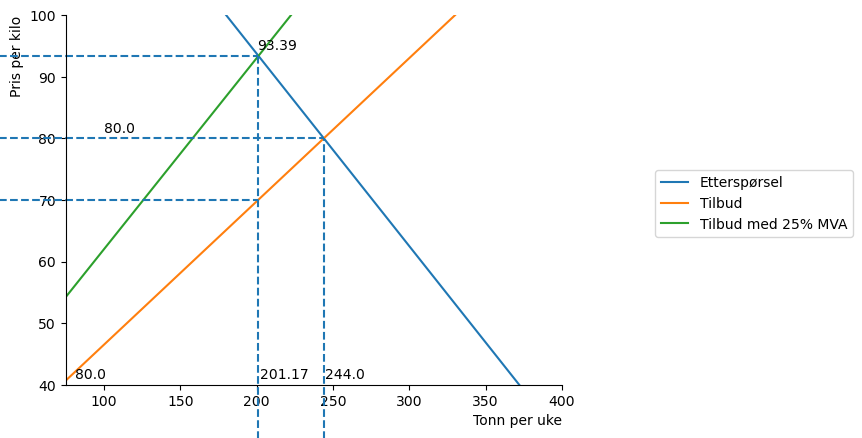

In [223]:
#Oppgave 2 med 3

ax.vlines(x_eq_fn(0),0,80, linestyles='dashed', clip_on=False)
ax.vlines(x_eq_fn(0.25),0, 93.39, linestyles='dashed', clip_on=False)
ax.hlines(p_eq_fn(0),0,244, linestyles='dashed', clip_on=False)
ax.hlines(p_eq_fn(0.25),0,201.16731517509726, linestyles='dashed', clip_on=False)

ax.hlines(70,0,201.16731517509726, linestyles='dashed', clip_on=False)


# sett inn likevektsverdier i figuren
ax.annotate(kvantumMva, xy=(kvantumMva+1,41), annotation_clip=False)
ax.annotate(kvantumUten, xy=(kvantumUten+1, 41), annotation_clip=False)
ax.annotate(p_konsum, xy=(100, p_konsum+1), annotation_clip=False)
ax.annotate(p_konsum2, xy=(200, p_konsum2+1), annotation_clip=False)
ax.annotate(p_konsum, xy=(p_konsum+1, 41), annotation_clip=False)


ax.legend(bbox_to_anchor=(1.6,0.6))

fig

In [ ]:
#Her ville ikke koden min funke så greit, den slettet bare tallene på siden og gjorde at ikke noe av den andre koden ville funke.
#Så jeg skriver bare slik jeg tenkte her.
#Linjen som ligger horisontalt på 70 i y-aksen fram til 201 i y-aksen og opp til den horisontale 80 på y-aksen ville vært fylt og vært produsent andelen.
#Fra 80 på y-aksen og opp til 93.39 på y aksen ville vært konsument andelen av mer verdien.



In [ ]:
#Oppgave 4

#En fordel med MVA er at det som en indirekte skatt gir staten mer penger å rutte med, det kommer fint med i Norge som en velferds stat. Det gir staten mer penger å rutte med slik at staten kan tilby gode offentlige tjenester til befolkningen.
#En ulempe med MVA er at det gjør prisen på varer enda høyere og med det, kanskje litt mindre attraktivt på markedet. Det er jo snakk om 15 og 25 prosten av varens verdi.

#En fordel med en stykkprisavgift kan være at det hjelper staten med å kompansere for forurensningen til en fabrikk når den produserer varer. De må betale en stykkprisavgift på 40 kr pr. enheter de selger for f.eks 120 kr pr enhet. 
#En ulempe med det er at det kan gjøre det veldig dyrt å produsere evt. varer og for oppstarter bedrifter å komme i gang i et marked. Og samtidig vil det jo igjen drive prisen opp for konsumentene, og kanskje bli mindre attraktivt på markedet.